# Assignment 3
All questions are weighted the same in this assignment. This assignment requires more individual learning then the last one did - you are encouraged to check out the [pandas documentation](http://pandas.pydata.org/pandas-docs/stable/) to find functions or methods you might not have used yet, or ask questions on [Stack Overflow](http://stackoverflow.com/) and tag them as pandas and python related. All questions are worth the same number of points except question 1 which is worth 17% of the assignment grade.

**Note**: Questions 2-13 rely on your question 1 answer.

In [1]:
import pandas as pd
import numpy as np

# Filter all warnings. If you would like to see the warnings, please comment the two lines below.
import warnings
warnings.filterwarnings('ignore')

### Question 1
Load the energy data from the file `assets/Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](assets/Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **Energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable]`

Convert `Energy Supply` to gigajoules (**Note: there are 1,000,000 gigajoules in a petajoule**). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with parenthesis in their name. Be sure to remove these, e.g. `'Bolivia (Plurinational State of)'` should be `'Bolivia'`.

Next, load the GDP data from the file `assets/world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `assets/scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries, and the rows of the DataFrame should be sorted by "Rank".*

In [2]:
def answer_one():
    
    Energy = pd.read_excel(io="utf-8''Energy Indicators.xls", header= None, skiprows=range(18), usecols="C:F")
    Energy = Energy.iloc[0:227] # Nos quedamos sólo con los índices que se necesitan
    Energy.set_axis(labels=["Country", "Energy Supply", "Energy Supply per Capita", "% Renewable"], axis="columns", inplace=True)
    Energy.replace(to_replace="...", value=np.NaN, inplace=True)
    Energy["Energy Supply"] = Energy["Energy Supply"] * 1*10**6
    Energy["Country"] = Energy["Country"].str.extract("(^[a-zA-Z\s\D]*)") #Limpiamos nombres de paises de la parte numérica
    
    def change_names_countries(name):
        """ Función utilizada para cambiar el nombre de algunos paises en particular"""
        if name == "Republic of Korea":
            return "South Korea"
        elif name == "United States of America":
            return "United States"
        elif name == "United Kingdom of Great Britain and Northern Ireland":
            return "United Kingdom"
        elif name == "China, Hong Kong Special Administrative Region":
            return "Hong Kong"
        else:
            return name
    
    Energy["Country"] = Energy["Country"].apply(func = lambda x: change_names_countries(x))
    Energy["Country"] = Energy["Country"].replace("\s\([\w\s]*\)$", "", regex=True)
    GDP = pd.read_csv("utf-8''world_bank.csv", skiprows=range(0,4))
    
    def change_names_DGP(name):
        if name == "Korea, Rep.":
            return "South Korea"
        elif name == "Iran, Islamic Rep.":
            return "Iran"
        elif name == "Hong Kong SAR, China":
            return "Hong Kong"
        else:
            return name
    
    GDP["Country Name"] = GDP["Country Name"].apply(lambda x: change_names_DGP(x))
    
    ScimEn = pd.read_excel("utf-8''scimagojr-3.xlsx")
    # El merge
    result = (pd.merge(ScimEn,Energy, how="inner", left_on="Country", right_on="Country")
            .merge(GDP, how="inner", left_on="Country", right_on="Country Name"))
    result = result.iloc[range(15)] # Seleccionando el Top 15
    result = result.set_index("Country") # Haciendo los nombres de los paises como indices
    result = result[['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
                     'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita',
                     '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]
    return result
    raise NotImplementedError()

In [3]:
answer_one().head()

Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
United States               265436                    8.20      230   
Japan                        61554                    7.31      134   
United Kingdom               37874                    9.84      139   
Russian Federation           12422                    1.85       57   

                    Energy Supply  Energy Supply per Capita  % Renewable  \
Country                                                                    
China                1.271910e+11                      93.0     19.75491   
United States        9.083800e+10                     286.0     11.57098   
Japan                1.898400e+10                     149.0     10.23282   
United Kingdom       7.920000e+09                     124.0     10.60047   
Russian Federation   3.070900e+10                     214.0     17.28868   

                            2006          2007          2008          2009  \
Country                                                                      
China               3.992331e+12  4.559041e+12  4.997775e+12  5.459247e+12   
United States       1.479230e+13  1.505540e+13  1.501149e+13  1.459484e+13   
Japan               5.496542e+12  5.617036e+12  5.558527e+12  5.251308e+12   
United Kingdom      2.419631e+12  2.482203e+12  2.470614e+12  2.367048e+12   
Russian Federation  1.385793e+12  1.504071e+12  1.583004e+12  1.459199e+12   

                            2010          2011          2012          2013  \
Country                                                                      
China               6.039659e+12  6.612490e+12  7.124978e+12  7.672448e+12   
United States       1.496437e+13  1.520402e+13  1.554216e+13  1.577367e+13   
Japan               5.498718e+12  5.473738e+12  5.569102e+12  5.644659e+12   
United Kingdom      2.403504e+12  2.450911e+12  2.479809e+12  2.533370e+12   
Russian Federation  1.524917e+12  1.589943e+12  1.645876e+12  1.666934e+12   

                            2014          2015  
Country                                         
China               8.230121e+12  8.797999e+12  
United States       1.615662e+13  1.654857e+13  
Japan               5.642884e+12  5.669563e+12  
United Kingdom      2.605643e+12  2.666333e+12  
Russian Federation  1.678709e+12  1.616149e+12

In [4]:
type(answer_one()) == pd.DataFrame, answer_one().shape == (15,20)

(True, True)

In [5]:
assert type(answer_one()) == pd.DataFrame, "Q1: You should return a DataFrame!"

assert answer_one().shape == (15,20), "Q1: Your DataFrame should have 20 columns and 15 entries!"


In [6]:
# Cell for autograder.


### Question 2
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [7]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [8]:
def answer_two():
    result = (227 + 264 + 191) - 3*162
    return int(result)
    raise NotImplementedError()

In [9]:
answer_two(), type(answer_two()) == int

(196, True)

In [10]:
assert type(answer_two()) == int, "Q2: You should return an int number!"


### Question 3
What are the top 15 countries for average GDP over the last 10 years?

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [11]:
def answer_three():
    df = answer_one()
    years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']    
    df["average GDP"] = np.mean(df[years],axis = 1)
    df = df.sort_values("average GDP",ascending=False)
    avgGDP = pd.Series(df["average GDP"], dtype=np.float)
    return avgGDP
    raise NotImplementedError()

In [12]:
answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: average GDP, dtype: float64

In [13]:
assert type(answer_three()) == pd.Series, "Q3: You should return a Series!"


### Question 4
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [14]:
def answer_four():
    df = answer_one()
    years = ['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']    
    df["average GDP"] = np.nanmean(df[years],axis = 1)
    df.sort_values("average GDP",ascending=False ,inplace = True)
    row = df.iloc[5][years] # the 6th country
    result =row.max() - row.min()
    #result = row["2015"] - row["2006"]
    return float(result)
    raise NotImplementedError()

In [15]:
answer_four()

299285784765.13965

In [16]:
# Cell for autograder.


### Question 5
What is the mean energy supply per capita?

*This function should return a single number.*

In [17]:
def answer_five():
    df = answer_one()
    result = np.nanmean(df["Energy Supply per Capita"], axis = 0)
    return float(result)
    raise NotImplementedError()

In [18]:
answer_five()

157.6

In [19]:
# Cell for autograder.


### Question 6
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [20]:
def answer_six():
    df = answer_one()
    maximum = np.max(df["% Renewable"], axis = 0)
    row_max = df[df["% Renewable"] == maximum]
    country = row_max.index[0]
    return country, maximum
    raise NotImplementedError()

In [21]:
answer_six()

('Brazil', 69.64803)

In [22]:
type(answer_six()) == tuple, type(answer_six()[0]) == str

(True, True)

In [23]:
assert type(answer_six()) == tuple, "Q6: You should return a tuple!"

assert type(answer_six()[0]) == str, "Q6: The first element in your result should be the name of the country!"


### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [24]:
def answer_seven():
    df = answer_one()
    df["ratio_Self-citations_Total_citations"] = df["Self-citations"]/df["Citations"]
    maximum_ratio = np.max(df["ratio_Self-citations_Total_citations"], axis = 0)
    row_at_max = df[df["ratio_Self-citations_Total_citations"] == maximum_ratio]
    country = row_at_max.index[0]
    return country, maximum_ratio
    raise NotImplementedError()

In [25]:
answer_seven()

('China', 0.6893126179389422)

In [26]:
type(answer_seven()) == tuple, type(answer_seven()[0]) == str

(True, True)

In [27]:
assert type(answer_seven()) == tuple, "Q7: You should return a tuple!"

assert type(answer_seven()[0]) == str, "Q7: The first element in your result should be the name of the country!"


### Question 8

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return the name of the country*

In [28]:
def answer_eight():
    df = answer_one()
    df["ES/ESpC"] = df["Energy Supply"]/df["Energy Supply per Capita"]
    population3 = df["ES/ESpC"].sort_values(ascending = False).iloc[2]
    row = df[df["ES/ESpC"] == population3]
    country = row.index[0]
    return country
    raise NotImplementedError()

In [29]:
answer_eight(), type(answer_eight()) == str

('United States', True)

In [30]:
assert type(answer_eight()) == str, "Q8: You should return the name of the country!"


### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [31]:
def answer_nine():
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    corr = np.corrcoef(x = Top15['Citable docs per Capita'], y = Top15['Energy Supply per Capita'])
    
    return corr[0,1]
    raise NotImplementedError()

In [32]:
answer_nine()

0.7940010435442946

In [33]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per Capita']
    Top15['Citable docs per Capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable docs per Capita', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])

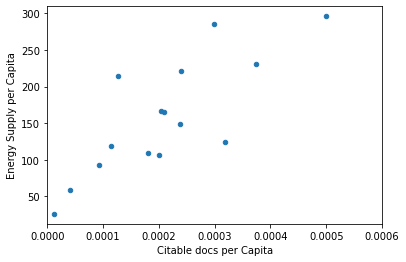

In [34]:
plot9()

In [35]:
answer_nine() >= -1. and answer_nine() <= 1.

True

In [36]:
assert answer_nine() >= -1. and answer_nine() <= 1., "Q9: A valid correlation should between -1 to 1!"


### Question 10
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [37]:
def answer_ten():
    df = answer_one()
    median = np.nanmedian(df["% Renewable"], axis = 0)
    df["dummy"] = df["% Renewable"].apply(lambda x: 1 if x>=median else 0)
    HighRenew = df["dummy"] #.sort_values(ascending=True)
    return HighRenew
    raise NotImplementedError()

In [38]:
answer_ten() , type(answer_ten()) == pd.Series

(Country
 China                 1
 United States         0
 Japan                 0
 United Kingdom        0
 Russian Federation    1
 Canada                1
 Germany               1
 India                 0
 France                1
 South Korea           0
 Italy                 1
 Spain                 1
 Iran                  0
 Australia             0
 Brazil                1
 Name: dummy, dtype: int64,
 True)

In [39]:
assert type(answer_ten()) == pd.Series, "Q10: You should return a Series!"


### Question 11
Use the following dictionary to group the Countries by Continent, then create a DataFrame that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [40]:
def continent():
    ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
    df = answer_one()
    continent_list = []
    for country_index in df.index:
        for country_dict, continent in ContinentDict.items():
            if country_index == country_dict:
                continent_list.append(continent)
    df["Continent"] = continent_list
    return df

In [41]:
df = continent()
df["population"] = df["Energy Supply"]/df["Energy Supply per Capita"]
result = df.reset_index().groupby("Continent").agg({"Country":  np.count_nonzero,"population":(np.sum, np.mean, np.std)})
result.set_axis(labels=['size', 'sum', 'mean', 'std'], axis=1, inplace=True)
result

size           sum          mean           std
Continent                                                    
Asia              5  2.898666e+09  5.797333e+08  6.790979e+08
Australia         1  2.331602e+07  2.331602e+07           NaN
Europe            6  4.579297e+08  7.632161e+07  3.464767e+07
North America     2  3.528552e+08  1.764276e+08  1.996696e+08
South America     1  2.059153e+08  2.059153e+08           NaN

In [42]:
def answer_eleven():
    def continent():
        ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
        df = answer_one()
        continent_list = []
        for country_index in df.index:
            for country_dict, continent in ContinentDict.items():
                if country_index == country_dict:
                    continent_list.append(continent)
        df["Continent"] = continent_list
        return df
    df = continent()
    df["population"] = df["Energy Supply"]/df["Energy Supply per Capita"]
    result = df.reset_index().groupby("Continent").agg({"Country":  np.count_nonzero,"population":(np.sum, np.mean, np.std)})
    result.set_axis(labels=['size', 'sum', 'mean', 'std'], axis=1, inplace=True)
    return result
    raise NotImplementedError()

In [43]:
answer_eleven()

size           sum          mean           std
Continent                                                    
Asia              5  2.898666e+09  5.797333e+08  6.790979e+08
Australia         1  2.331602e+07  2.331602e+07           NaN
Europe            6  4.579297e+08  7.632161e+07  3.464767e+07
North America     2  3.528552e+08  1.764276e+08  1.996696e+08
South America     1  2.059153e+08  2.059153e+08           NaN

In [44]:
type(answer_eleven()) == pd.DataFrame, answer_eleven().shape[0] == 5, answer_eleven().shape[1] == 4

(True, True, True)

In [45]:
assert type(answer_eleven()) == pd.DataFrame, "Q11: You should return a DataFrame!"

assert answer_eleven().shape[0] == 5, "Q11: Wrong row numbers!"

assert answer_eleven().shape[1] == 4, "Q11: Wrong column numbers!"


### Question 12
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a Series with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [46]:
def answer_twelve():
    def continent():
        ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}
        df = answer_one()
        continent_list = []
        for country_index in df.index:
            for country_dict, continent in ContinentDict.items():
                if country_index == country_dict:
                    continent_list.append(continent)
        df["Continent"] = continent_list
        return df
    df = continent()
    result = df.reset_index().groupby("Continent").agg({"Country": np.count_nonzero}) 
#    df["bin"] = pd.qcut(df["% Renewable"], 5, labels=False)
#    df.reset_index(inplace=True)
#    result = df.groupby(["Continent", "bin"]).agg({"Country": np.count_nonzero})
    return result
#    raise NotImplementedError()


In [47]:
answer_twelve()

Country
Continent             
Asia                 5
Australia            1
Europe               6
North America        2
South America        1

In [48]:
assert type(answer_twelve()) == pd.Series, "Q12: You should return a Series!"

assert len(answer_twelve()) == 9, "Q12: Wrong result numbers!"


AssertionError: Q12: You should return a Series!

### Question 13
Convert the Population Estimate series to a string with thousands separator (using commas). Use all significant digits (do not round the results).

e.g. 12345678.90 -> 12,345,678.90

*This function should return a series `PopEst` whose index is the country name and whose values are the population estimate string*

In [49]:
def answer_thirteen():
    df = answer_one()
    df["PopEst"] = df["Energy Supply"]/ df["Energy Supply per Capita"]
    list_pop = []
    for population in df["PopEst"]:
        list_pop.append(f"{population:,}")
    result = pd.Series(list_pop, index=df.index)
    return result
    raise NotImplementedError()

In [50]:
answer_thirteen(), type(answer_thirteen()) == pd.Series, len(answer_thirteen()) == 15

(Country
 China                 1,367,645,161.2903225
 United States          317,615,384.61538464
 Japan                  127,409,395.97315437
 United Kingdom         63,870,967.741935484
 Russian Federation            143,500,000.0
 Canada                  35,239,864.86486486
 Germany                 80,369,696.96969697
 India                 1,276,730,769.2307692
 France                  63,837,349.39759036
 South Korea            49,805,429.864253394
 Italy                  59,908,256.880733944
 Spain                    46,443,396.2264151
 Iran                    77,075,630.25210084
 Australia              23,316,017.316017315
 Brazil                 205,915,254.23728815
 dtype: object,
 True,
 True)

In [51]:
assert type(answer_thirteen()) == pd.Series, "Q13: You should return a Series!"

assert len(answer_thirteen()) == 15, "Q13: Wrong result numbers!"


### Optional

Use the built in function `plot_optional()` to see an example visualization.

In [52]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


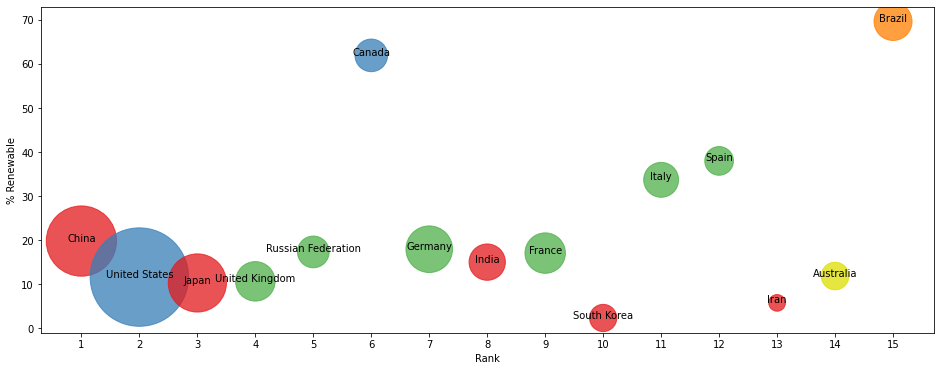

In [53]:
plot_optional()